# Car accident

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import datetime
import os

if not os.path.exists('Graphen'):
    os.mkdir('Graphen')
if not os.path.exists('Daten'):
    os.mkdir('Daten')

In [105]:
try:
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding='WINDOWS-1252')
except:
    with open('FARS2021NationalCSV/accident.csv', 'rb') as f:
        result = chardet.detect(f.read())  # or readline if the file is large
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding=result)
    print(result)
accidents['date'] = pd.to_datetime(accidents[['YEAR','MONTH','DAY']])


try:
    people = pd.read_csv('Daten/people.csv',index_col=0)
except:
    people = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv',encoding='ISO-8859-10')
    people.to_csv('Daten/people.csv')
    
try:
    Google_daten = pd.read_csv('Daten/Google_daten(US).csv',parse_dates=['date'],index_col=0)
except:
    Google_daten = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v2/main.csv',skiprows=range(1,14096993),nrows=2368485,parse_dates=['date'])
    Google_daten.sort_values(by=['subregion1_name','date'])
    Google_daten.to_csv('Daten/Google_daten(US).csv')

#remove unnecessary data
Google_daten = Google_daten.groupby(by=['subregion1_name','date']).first().reset_index()


print(accidents_state)

print(people[people['CTYNAME'].isin(people['STNAME'])][['STATE','CTYNAME','POPESTIMATE2021']].groupby('STATE').first())
print(accidents.columns)
print(accidents)

/tmp/ipykernel_15273/3140910689.py:18: DtypeWarning: Columns (12,13,103) have mixed types. Specify dtype option on import or set low_memory=False.
  Google_daten = pd.read_csv('Daten/Google_daten(US).csv',parse_dates=['date'],index_col=0)


       CASES             STATENAME  Population  POPULATION_2021  CASES_NORM  \
STATE                                                                         
1        885               Alabama     4858979          5039877    0.000182   
2         59                Alaska      738432           732673    0.000080   
4       1063               Arizona     6828065          7276316    0.000156   
5        631              Arkansas     2978204          3025891    0.000212   
6       3983            California    39144818         39237836    0.000102   
8        638              Colorado     5456574          5812069    0.000117   
9        283           Connecticut     3590886          3605597    0.000079   
10       132              Delaware      945934          1003384    0.000140   
11        40  District of Columbia      705749           670050    0.000057   
12      3451               Florida    20271272         21781128    0.000170   
13      1670               Georgia    10214860      

In [106]:
print(Google_daten)
Google_daten = Google_daten.groupby(by=['subregion1_name','date']).first().reset_index()
print(temp2)
Google_daten = Google_daten.sort_values(by=['subregion1_name','date'])
temp = accidents
#print(temp['subregion1_name'].unique())
print(Google_daten['subregion1_name'].unique())
temp['subregion1_name'] = temp['STATENAME']
temp = temp.groupby(['subregion1_name','date']).size().reset_index(name='cases')
Google_daten = pd.merge(Google_daten,temp, on=['subregion1_name','date'],how='left')
Google_daten = Google_daten.fillna(0)
print(Google_daten[['subregion1_name','date','cases']])


accidents_state = accidents.value_counts('STATE',sort=False).to_frame()
accidents_state['CASES'] = accidents_state['count']
del accidents_state['count']



accidents_state['STATENAME'] = accidents['STATENAME'].unique()
accidents_state['Population'] = Google_daten[Google_daten['date']>'2021'].groupby('subregion1_name').first()['population'][accidents['STATENAME'].unique()].to_numpy()

accidents_state['POPULATION_2021'] = people[people['CTYNAME'].isin(people['STNAME'])].groupby('STATE').first()['POPESTIMATE2021']
accidents_state['CASES_NORM'] = accidents_state['CASES']/accidents_state['Population']
accidents_state['CASES/100000'] = accidents_state['CASES_NORM']*100000

Google_daten['CASES/100000'] = Google_daten['cases']/Google_daten['population']*100000

print(accidents_state)

      subregion1_name       date    key                     place_id wikidata  \
0             Alabama 2020-01-01  US_AL  ChIJdf5LHzR_hogR6czIUzU0VV4     Q173   
1             Alabama 2020-01-02  US_AL  ChIJdf5LHzR_hogR6czIUzU0VV4     Q173   
2             Alabama 2020-01-03  US_AL  ChIJdf5LHzR_hogR6czIUzU0VV4     Q173   
3             Alabama 2020-01-04  US_AL  ChIJdf5LHzR_hogR6czIUzU0VV4     Q173   
4             Alabama 2020-01-05  US_AL  ChIJdf5LHzR_hogR6czIUzU0VV4     Q173   
...               ...        ...    ...                          ...      ...   
40371         Wyoming 2021-12-17  US_WY  ChIJaS7hSDTiXocRLzh90nkisCY    Q1214   
40372         Wyoming 2021-12-18  US_WY  ChIJaS7hSDTiXocRLzh90nkisCY    Q1214   
40373         Wyoming 2021-12-19  US_WY  ChIJaS7hSDTiXocRLzh90nkisCY    Q1214   
40374         Wyoming 2021-12-20  US_WY  ChIJaS7hSDTiXocRLzh90nkisCY    Q1214   
40375         Wyoming 2021-12-21  US_WY  ChIJaS7hSDTiXocRLzh90nkisCY    Q1214   

      datacommons country_c

## List cases

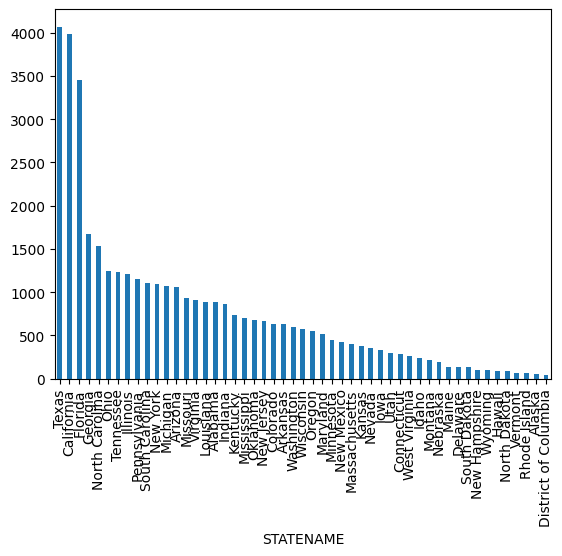

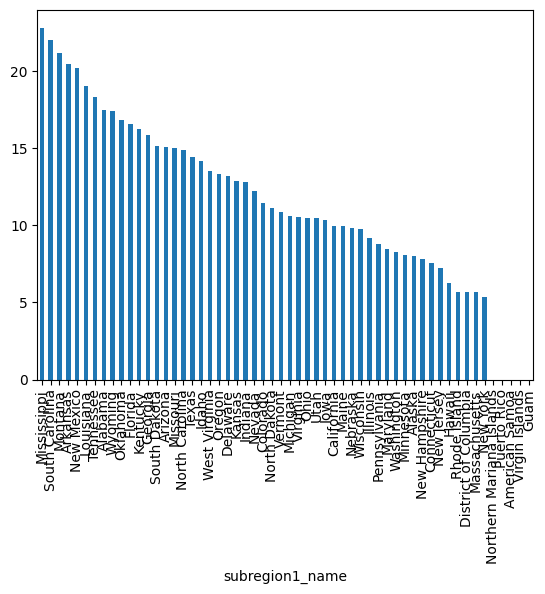

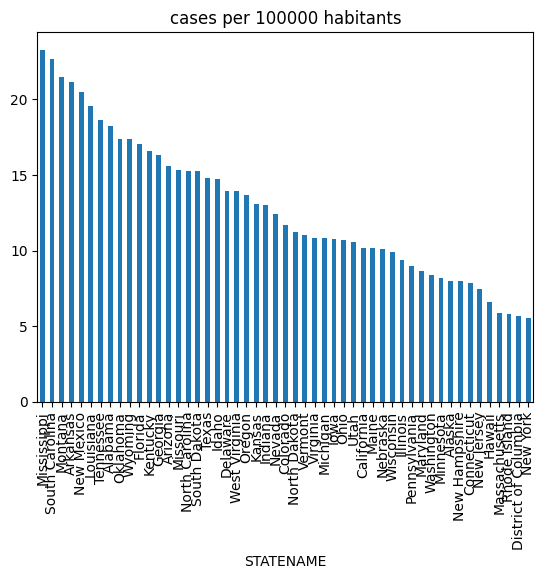

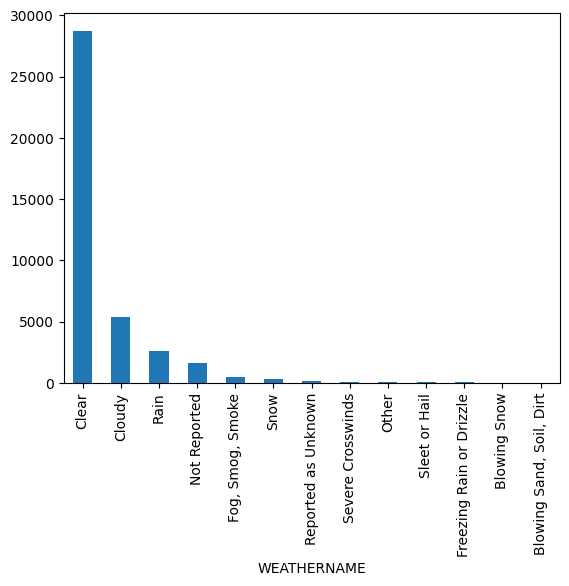

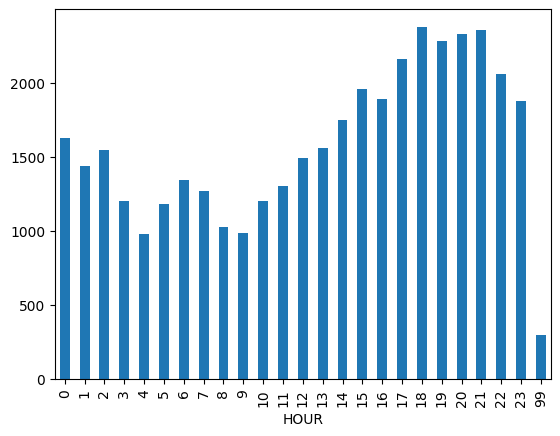

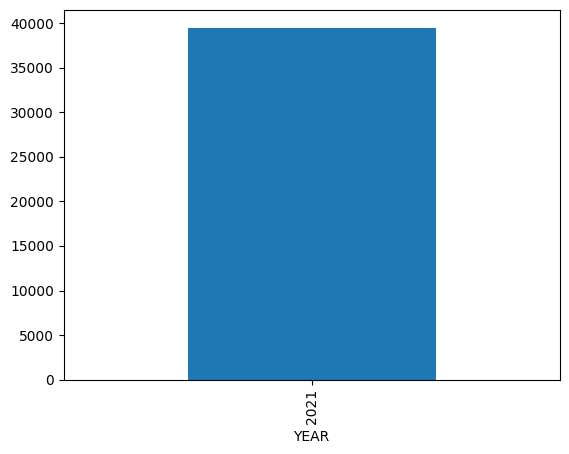

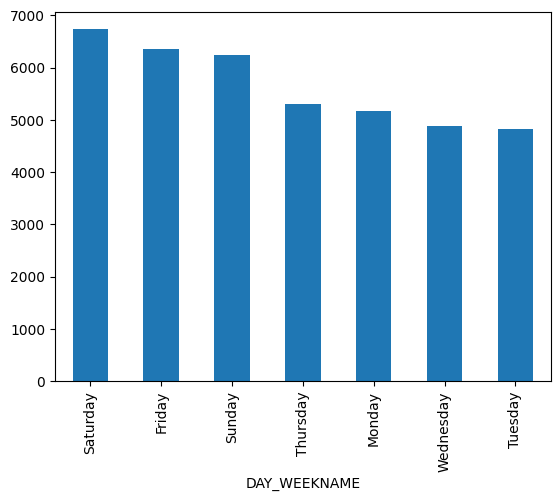

HARM_EVNAME
Motor Vehicle In-Transport    15798
Pedestrian                     6790
other                          6302
Rollover/Overturn              2825
Tree (Standing Only)           2660
Curb                           1376
Ditch                          1047
Pedalcyclist                    959
Embankment                      921
Guardrail Face                  830
Name: count, dtype: int64
Index(['Motor Vehicle In-Transport', 'Pedestrian', 'other',
       'Rollover/Overturn', 'Tree (Standing Only)', 'Curb', 'Ditch',
       'Pedalcyclist', 'Embankment', 'Guardrail Face'],
      dtype='object', name='HARM_EVNAME')
HARM_EVNAME            Curb  Ditch  Embankment  Guardrail Face  \
STATENAME                                                        
Alabama                 4.0   42.0        17.0            10.0   
Alaska                  1.0    2.0         NaN             NaN   
Arizona                48.0    4.0        13.0            14.0   
Arkansas                8.0   21.0        21.

<Figure size 640x480 with 0 Axes>

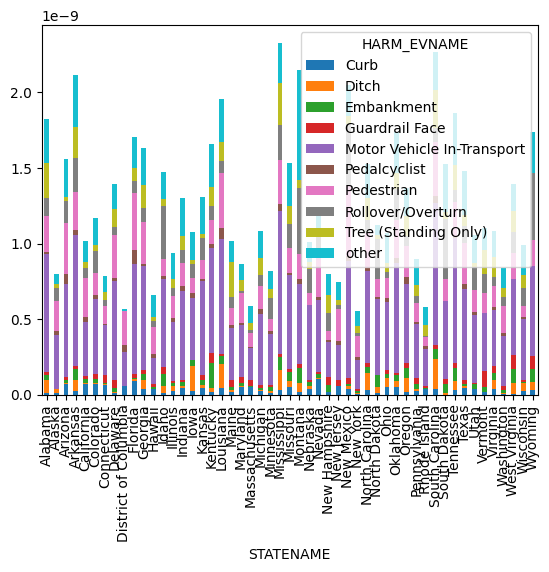

In [129]:


plt.figure()
accidents['STATENAME'].value_counts().plot.bar()
plt.show()

plt.figure()
Google_daten.groupby('subregion1_name')['CASES/100000'].sum().sort_values(ascending=False).plot(kind='bar')
#Google_daten.groupby('subregion1_name')['mobility_workspaces'].first().plot(kind='bar')
plt.show()


plt.figure()
plt.title('cases per 100000 habitants')
accidents_state.set_index('STATENAME')['CASES/100000'].sort_values(ascending=False).plot.bar()
plt.show()

plt.figure()
accidents['WEATHERNAME'].value_counts().plot.bar()
plt.show()

plt.figure()
accidents['HOUR'].value_counts().sort_index().plot.bar()
plt.show()

plt.figure()
accidents['YEAR'].value_counts().sort_index().plot.bar()
plt.show()

plt.figure()
accidents['DAY_WEEKNAME'].value_counts().plot.bar()
plt.show()


print(accidents['HARM_EVNAME'].value_counts())
print(accidents['HARM_EVNAME'].value_counts().index[:10])
#accidents['HARM_ENVNAME'][accidents['HARM_EVNAME'].isin(accidents['HARM_EVNAME'].value_counts().index[10:])] = 'other'
accidents['HARM_EVNAME'] = accidents['HARM_EVNAME'].replace(accidents['HARM_EVNAME'].value_counts().index[10:],'other')
print(accidents.groupby(['STATENAME','HARM_EVNAME']).size().unstack())

plt.figure()
accidents.groupby(['STATENAME','HARM_EVNAME']).size().unstack().div(accidents_state.set_index('STATENAME')['Population']*100000,axis=0).plot(kind='bar',stacked=True)
plt.show()